In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("heart.csv", sep=",")

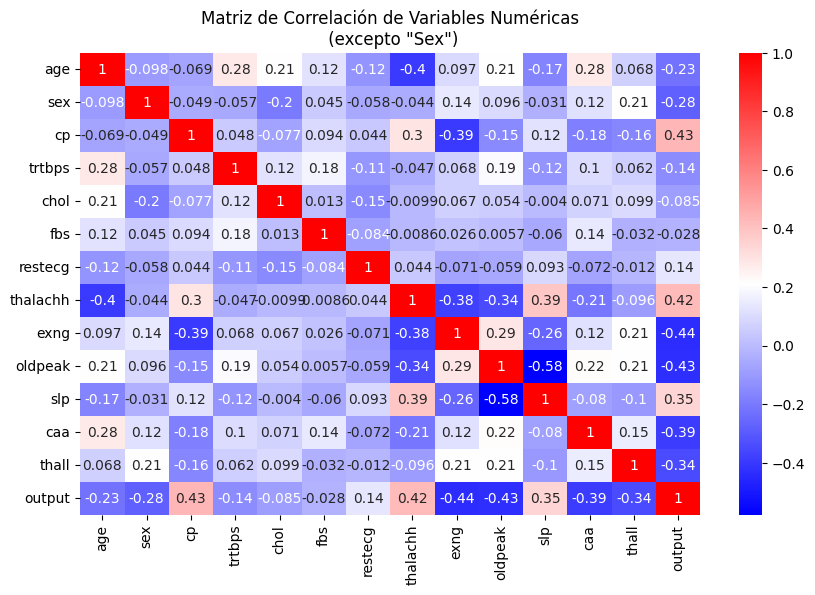

In [3]:
# Todas son numericas excepto sex
df_corr = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(df_corr, annot=True, cmap='bwr')
plt.title('Matriz de Correlación de Variables Numéricas\n (excepto "Sex")')
plt.show()

In [4]:
x = df.drop(columns=["output"])
y = df["output"]

# Balanceo de datos


output
1    165
0    138
Name: count, dtype: int64

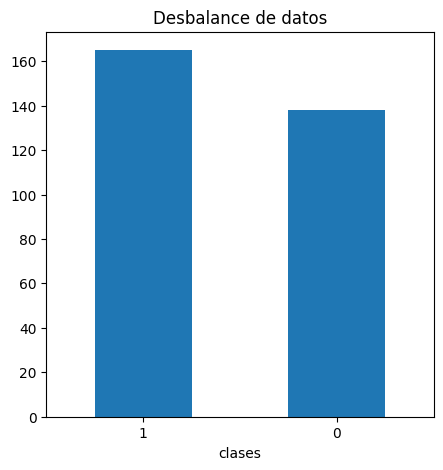

In [5]:
y_counts = y.value_counts()
plt.figure(figsize= (5,5))
y_counts.plot(kind="bar", rot=0)
plt.xticks(range(2))
plt.title("Desbalance de datos")
plt.xlabel("clases")

y_counts

In [6]:
from imblearn.over_sampling import SMOTE

# smote
smote=SMOTE(sampling_strategy="auto",random_state=50, k_neighbors=6)
x_resampled,y_resampled=smote.fit_resample(x,y)

y_counts=y_resampled.value_counts()
y_counts

output
1    165
0    165
Name: count, dtype: int64

# Separacion de datos

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled,y_resampled, test_size=0.2, random_state = 0)
x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)

# Logistic Regression


In [8]:
model = LogisticRegression().fit(x_train, y_train)

c:\Users\User Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
y_pred = model.predict(x_test)

In [10]:
print(accuracy_score(y_test, y_pred))

0.8484848484848485


In [11]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

<Axes: >

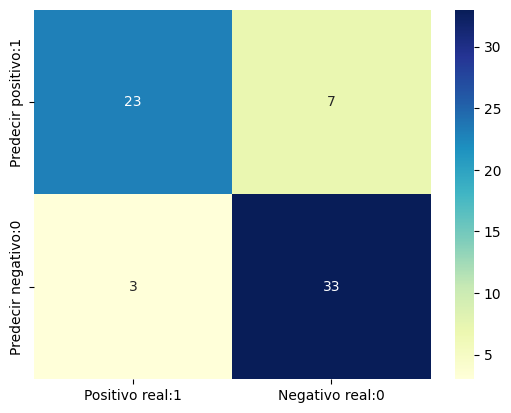

In [12]:
# visualizar matriz de confusión con mapa de calor marino

cm_matrix = pd.DataFrame(data=cm, columns=['Positivo real:1', 'Negativo real:0'],
                                  index=['Predecir positivo:1', 'Predecir negativo:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [13]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8417


# Decision Trees

In [8]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier().fit(x_train, y_train)

In [9]:
from sklearn import metrics
y_can_pred = decision_tree_model.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_can_pred))

Accuracy: 0.7121212121212122


<Axes: >

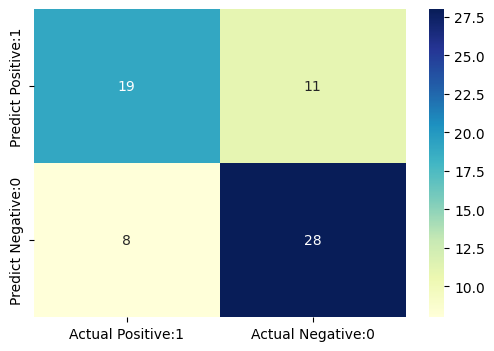

In [10]:
# Print the Confusion Matrix with max_depht(por defecto) and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_can_pred)

# visualize confusion matrix with seaborn heatmap

plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [11]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_can_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.7056


[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

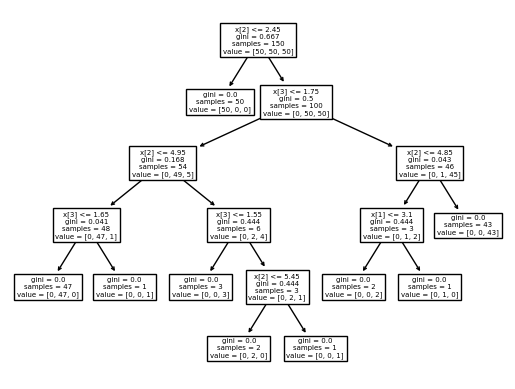

In [12]:
from sklearn.datasets import load_iris
from sklearn import tree
# clf = tree.DecisionTreeClassifier(random_state=0)
iris = load_iris()
clf = decision_tree_model.fit(iris.data, iris.target)
tree.plot_tree(clf)

# Random Forest


Build Random Forest Model with Hyperparameters

In [13]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [14]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [16]:
# GridSearchCV for Hyperparameter adjusting
# from sklearn.model_selection import GridSearchCV
# rf_Grid = GridSearchCV(estimator = model_random_forest, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)
# rf_Grid.fit(x_train, y_train)
# rf_Grid.best_params_

In [19]:
from sklearn.ensemble import RandomForestClassifier
model_random_forest = RandomForestClassifier(bootstrap= True,
 max_depth= 4,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 33)


In [20]:
model_random_forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=33)

In [21]:
importances = model_random_forest.feature_importances_
print(importances)

[0.0572124  0.02165482 0.16506812 0.0353553  0.03358353 0.00218428
 0.00511431 0.16953046 0.03379846 0.14201112 0.11629998 0.17466936
 0.04351786]


In [22]:
# Asociar cada importancia con su característica correspondiente
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(df.columns.tolist(), importances)]

# Ordenar las características por importancia
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Imprimir la importancia de cada característica
for feature, importance in feature_importances:
    print(f"{feature}: {importance}")

cp: 0.17
thalachh: 0.17
caa: 0.17
oldpeak: 0.14
slp: 0.12
age: 0.06
trtbps: 0.04
thall: 0.04
chol: 0.03
exng: 0.03
sex: 0.02
restecg: 0.01
fbs: 0.0


In [23]:
print (f'Train Accuracy - : {model_random_forest.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {model_random_forest.score(x_test,y_test):.3f}')
print (f'Test Accuracy - : {model_random_forest.score(x_test,y_test)}')

Train Accuracy - : 0.909
Test Accuracy - : 0.788
Test Accuracy - : 0.7878787878787878


In [24]:
y_pred_test = model_random_forest.predict(x_test)
# View accuracy score

accuracy_score(y_test, y_pred_test)

0.7878787878787878

In [ ]:
# print (f'Train Accuracy - : {rf_Grid.score(x_train,y_train):.3f}')
# print (f'Test Accuracy - : {rf_Grid.score(x_test,y_test):.3f}')
# y_can_pred = rf_Grid.predict(x_test)

In [25]:
y_can_pred = model_random_forest.predict(x_test)

<Axes: >

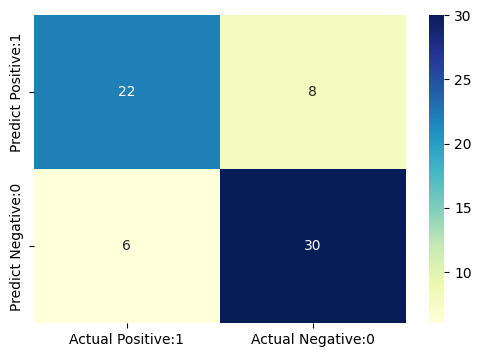

In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_can_pred)

# visualize confusion matrix with seaborn heatmap

plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [27]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_can_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.7833


Accuracy: 0.7878787878787878
Precision: 0.7894736842105263
Recall: 0.8333333333333334
F1-score: 0.8108108108108109


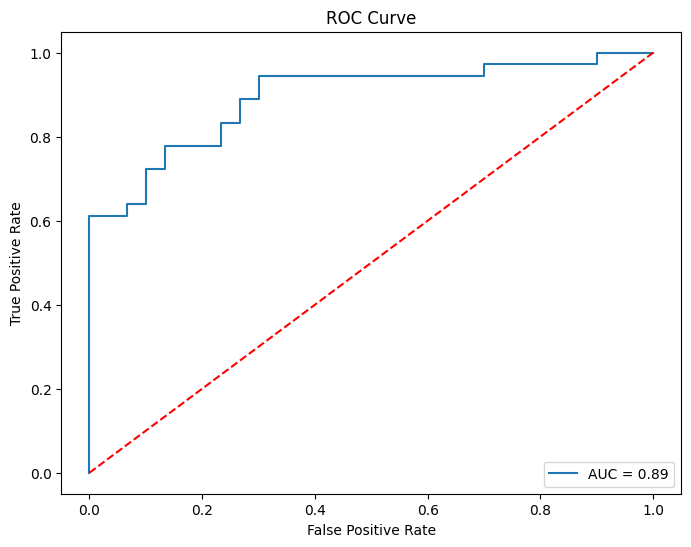

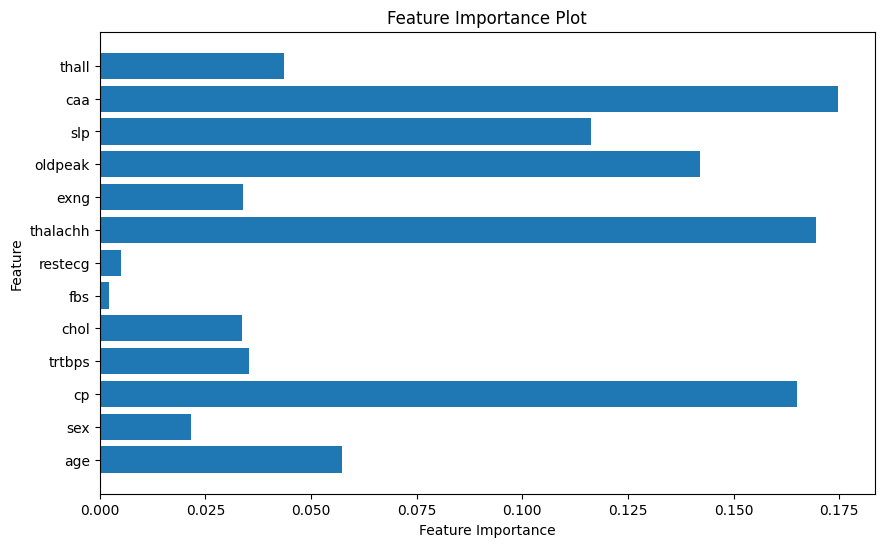

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

y_pred = y_can_pred
rf_model = model_random_forest
X_test = x_test
feature_names = df.columns.tolist()[:-1]  # Exclude the target column 'output'

# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 3. Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# 4. Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# 5. F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

# 6. ROC Curve and AUC-ROC
y_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for positive class
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
AUC = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {AUC:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 8. Feature Importance
feature_importance = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)  # Assuming you have a list of feature names
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()


C:\Users\User Dell\AppData\Local\Temp\ipykernel_14936\1751892944.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= name_metrics, y= dato_metrics, palette="viridis")


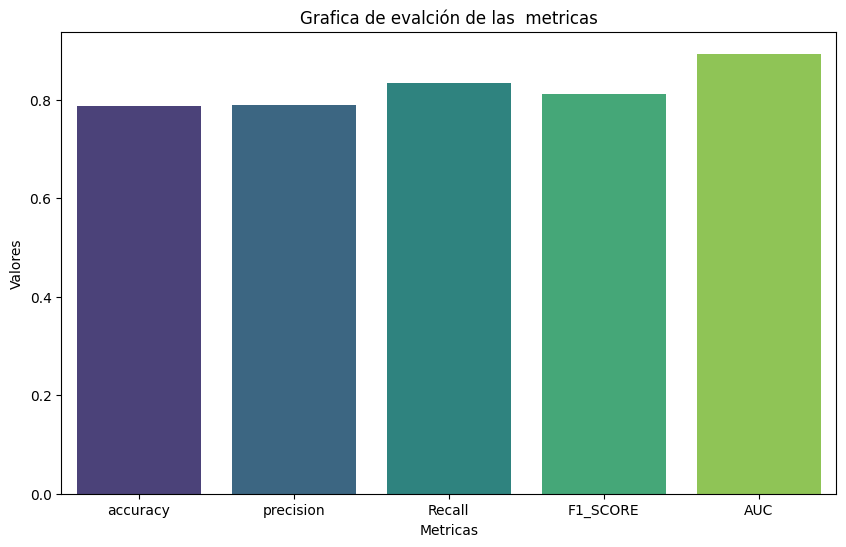

In [29]:
name_metrics=["accuracy", "precision", "Recall", "F1_SCORE", "AUC"]
dato_metrics=[accuracy,precision,recall,f1,AUC]

plt.figure(figsize=(10,6))
sns.barplot(x= name_metrics, y= dato_metrics, palette="viridis")
plt.title("Grafica de evalción de las  metricas")
plt.xlabel("Metricas")
plt.ylabel("Valores")
plt.show()

# Explanation of metrics:

*   Accuracy: The ratio of correctly predicted instances to the total instances in the dataset.
*   Confusion Matrix: A table showing the number of correct predictions and errors made by the classifier.
*   Precision: The ratio of true positive predictions to the total predicted positives. It measures the model's ability to correctly identify positive instances.
*   Recall: The ratio of true positive predictions to the total actual positives. It measures the model's ability to capture all positive instances.
*   F1-score: The harmonic mean of precision and recall. It provides a balance between precision and recall.
*   ROC Curve and AUC-ROC: ROC curve is a graphical representation of the model's ability to distinguish between different classes. AUC-ROC represents the area under the ROC curve and is a measure of the model's performance.
*   Feature Importance: A measure of how much each feature contributes to the model's predictions.

# Explain Decision Trees and Random Forest

# Why random Forest is more Robust than Decision Trees?


# Random Forest Hyperparameter Tuning

# The power of Random Forest: Feature recovering